# Ragnarok Mobile Time Series Analysis

Hello, 

RomExchange API Sandbox is currently a notebook where I can tinker with the Ro mobile Exchange API (see API Docs below).
By tinker I mean:
1. Making requests and obtaining data. 
2. Using Data in time series analysis.
3. Implementing time series models e.g. SarimaX

The data coveted is the historical market value of items in the game.

API Docs : https://jessicayeh.github.io/rom-exchange-openapi/#section/Recent-Changes

# Contents

1. **Importing Libraries**  
2. **Making requests**  
3. **Extract Transfer Load**  
4. **Cleaning Data**  
5. **Exploratory Data analysis**  
5. **Time series modeling**  

## 1. Importing Libraries

In [1]:
import pandas as pd
import requests
import json

# from time import sleep

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
sns.set()

from numpy import median


## 2. Making Requests

In [2]:
# Define URL and Headers for the get below:
# Pet material data:
url = 'https://www.romexchange.com/api?item=abyssflower&exact=false&sort=change&sort_dir=desc&sort_server=global&range=all&page=1' 
headers = {'User-Agent': 'XY', 'Content-type': 'application/json'}

# To make a request over more periods of time will need to use the page query and set the page=2,3,4,5 etc. 
# Perhaps Automate this? Windows Task Scheduler?

In [3]:
# Make request for the data
r = requests.get(url, headers = headers)

In [4]:
r.status_code

200

In [5]:
# Obtain content of request payload
print(r.text)

[{"name":"Abyss Flower","type":11,"image":null,"global_sea_diff":-9.2,"global":{"all":{"data":[{"snap":false,"price":2869,"time":"2019-01-23T21:20:31Z"},{"snap":false,"price":1740,"time":"2019-01-30T15:38:52Z"},{"snap":false,"price":1083,"time":"2019-02-06T14:49:32Z"},{"snap":false,"price":905,"time":"2019-02-13T10:08:31Z"},{"snap":false,"price":901,"time":"2019-02-20T14:42:40Z"},{"snap":false,"price":805,"time":"2019-02-27T12:13:16Z"},{"snap":false,"price":643,"time":"2019-03-06T10:16:04Z"},{"snap":false,"price":561,"time":"2019-03-12T09:10:29Z"},{"snap":false,"price":624,"time":"2019-03-19T14:34:19Z"},{"snap":false,"price":543,"time":"2019-03-26T09:13:40Z"},{"snap":false,"price":551,"time":"2019-04-02T09:12:21Z"},{"snap":false,"price":535,"time":"2019-04-09T09:12:54Z"},{"snap":false,"price":522,"time":"2019-04-16T09:18:37Z"},{"snap":false,"price":459,"time":"2019-04-23T09:14:21Z"},{"snap":false,"price":459,"time":"2019-04-30T09:14:33Z"},{"snap":false,"price":469,"time":"2019-05-07T09

## 3. Extract Transfer Load

In [6]:
import json
import pandas as pd
# Jsonify the data payload
j = r.json()
type(j)

list

In [7]:
j

[{'name': 'Abyss Flower',
  'type': 11,
  'image': None,
  'global_sea_diff': -9.2,
  'global': {'all': {'data': [{'snap': False,
      'price': 2869,
      'time': '2019-01-23T21:20:31Z'},
     {'snap': False, 'price': 1740, 'time': '2019-01-30T15:38:52Z'},
     {'snap': False, 'price': 1083, 'time': '2019-02-06T14:49:32Z'},
     {'snap': False, 'price': 905, 'time': '2019-02-13T10:08:31Z'},
     {'snap': False, 'price': 901, 'time': '2019-02-20T14:42:40Z'},
     {'snap': False, 'price': 805, 'time': '2019-02-27T12:13:16Z'},
     {'snap': False, 'price': 643, 'time': '2019-03-06T10:16:04Z'},
     {'snap': False, 'price': 561, 'time': '2019-03-12T09:10:29Z'},
     {'snap': False, 'price': 624, 'time': '2019-03-19T14:34:19Z'},
     {'snap': False, 'price': 543, 'time': '2019-03-26T09:13:40Z'},
     {'snap': False, 'price': 551, 'time': '2019-04-02T09:12:21Z'},
     {'snap': False, 'price': 535, 'time': '2019-04-09T09:12:54Z'},
     {'snap': False, 'price': 522, 'time': '2019-04-16T09:18

In [8]:
# Reference for Dataframe indexing below
j[0]

{'name': 'Abyss Flower',
 'type': 11,
 'image': None,
 'global_sea_diff': -9.2,
 'global': {'all': {'data': [{'snap': False,
     'price': 2869,
     'time': '2019-01-23T21:20:31Z'},
    {'snap': False, 'price': 1740, 'time': '2019-01-30T15:38:52Z'},
    {'snap': False, 'price': 1083, 'time': '2019-02-06T14:49:32Z'},
    {'snap': False, 'price': 905, 'time': '2019-02-13T10:08:31Z'},
    {'snap': False, 'price': 901, 'time': '2019-02-20T14:42:40Z'},
    {'snap': False, 'price': 805, 'time': '2019-02-27T12:13:16Z'},
    {'snap': False, 'price': 643, 'time': '2019-03-06T10:16:04Z'},
    {'snap': False, 'price': 561, 'time': '2019-03-12T09:10:29Z'},
    {'snap': False, 'price': 624, 'time': '2019-03-19T14:34:19Z'},
    {'snap': False, 'price': 543, 'time': '2019-03-26T09:13:40Z'},
    {'snap': False, 'price': 551, 'time': '2019-04-02T09:12:21Z'},
    {'snap': False, 'price': 535, 'time': '2019-04-09T09:12:54Z'},
    {'snap': False, 'price': 522, 'time': '2019-04-16T09:18:37Z'},
    {'snap'

In [8]:
# make a dataframe out of just the 'data', price' dict headers and add the name of the item
j[0]['name']

dfglobal = pd.DataFrame(j[0]['global']['all']['data'])
dfglobal['name'] = j[0]['name']
dfglobal['server'] = 'Global'

dfsea = pd.DataFrame(j[0]['sea']['all']['data'])
dfsea['name'] = j[0]['name']
dfsea['server'] = 'Sea'

dfsea

df1 = dfglobal.append(dfsea)
df1

,snap,price,time,name,server
0,False,2869,2019-01-23T21:20:31Z,Abyss Flower,Global
1,False,1740,2019-01-30T15:38:52Z,Abyss Flower,Global
2,False,1083,2019-02-06T14:49:32Z,Abyss Flower,Global
3,False,905,2019-02-13T10:08:31Z,Abyss Flower,Global
4,False,901,2019-02-20T14:42:40Z,Abyss Flower,Global
...,...,...,...,...,...
45,False,291,2019-12-10T12:02:46Z,Abyss Flower,Sea
46,False,311,2019-12-17T11:40:55Z,Abyss Flower,Sea
47,False,301,2019-12-24T11:46:25Z,Abyss Flower,Sea
48,False,267,2019-12-31T11:30:13Z,Abyss Flower,Sea


## 4. Cleaning Data

In [9]:
#Cleaning the Date-Time column is necessary. 
# are there any missing values?
df1.isna().sum()


snap      0
price     0
time      0
name      0
server    0
dtype: int64

In [10]:
# Dealing with Date-Time column:
df1.time = pd.to_datetime(df1.time, errors='raise')
df1

,snap,price,time,name,server
0,False,2869,2019-01-23 21:20:31+00:00,Abyss Flower,Global
1,False,1740,2019-01-30 15:38:52+00:00,Abyss Flower,Global
2,False,1083,2019-02-06 14:49:32+00:00,Abyss Flower,Global
3,False,905,2019-02-13 10:08:31+00:00,Abyss Flower,Global
4,False,901,2019-02-20 14:42:40+00:00,Abyss Flower,Global
...,...,...,...,...,...
45,False,291,2019-12-10 12:02:46+00:00,Abyss Flower,Sea
46,False,311,2019-12-17 11:40:55+00:00,Abyss Flower,Sea
47,False,301,2019-12-24 11:46:25+00:00,Abyss Flower,Sea
48,False,267,2019-12-31 11:30:13+00:00,Abyss Flower,Sea


In [11]:
# check that the time column is indeed datetime:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   snap    100 non-null    bool               
 1   price   100 non-null    int64              
 2   time    100 non-null    datetime64[ns, UTC]
 3   name    100 non-null    object             
 4   server  100 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 4.0+ KB


In [12]:
# Set time as the index 
df1.set_index('time', inplace=True)

In [13]:
df1

,snap,price,name,server
time,,,,
2019-01-23 21:20:31+00:00,False,2869,Abyss Flower,Global
2019-01-30 15:38:52+00:00,False,1740,Abyss Flower,Global
2019-02-06 14:49:32+00:00,False,1083,Abyss Flower,Global
2019-02-13 10:08:31+00:00,False,905,Abyss Flower,Global
2019-02-20 14:42:40+00:00,False,901,Abyss Flower,Global
...,...,...,...,...
2019-12-10 12:02:46+00:00,False,291,Abyss Flower,Sea
2019-12-17 11:40:55+00:00,False,311,Abyss Flower,Sea
2019-12-24 11:46:25+00:00,False,301,Abyss Flower,Sea


In [14]:
# Groupby Server and aggregate price means:
df1.groupby('server')['price'].mean()


server
Global    584.38
Sea       421.68
Name: price, dtype: float64

### Load Data into SQL

In [14]:
# Create and connect to an SQL Database:
import sqlite3 
conn = sqlite3.connect('romexchange.db')
cur = conn.cursor()

In [15]:
df1.to_sql(name='abyss_flowers', if_exists='replace', con=conn)

In [16]:
cur.execute("""SELECT * FROM abyss_flowers;""").fetchall()

[(0, 0, 2869, '2019-01-23 21:20:31+00:00', 'Abyss Flower', 'Global'),
 (1, 0, 1740, '2019-01-30 15:38:52+00:00', 'Abyss Flower', 'Global'),
 (2, 0, 1083, '2019-02-06 14:49:32+00:00', 'Abyss Flower', 'Global'),
 (3, 0, 905, '2019-02-13 10:08:31+00:00', 'Abyss Flower', 'Global'),
 (4, 0, 901, '2019-02-20 14:42:40+00:00', 'Abyss Flower', 'Global'),
 (5, 0, 805, '2019-02-27 12:13:16+00:00', 'Abyss Flower', 'Global'),
 (6, 0, 643, '2019-03-06 10:16:04+00:00', 'Abyss Flower', 'Global'),
 (7, 0, 561, '2019-03-12 09:10:29+00:00', 'Abyss Flower', 'Global'),
 (8, 0, 624, '2019-03-19 14:34:19+00:00', 'Abyss Flower', 'Global'),
 (9, 0, 543, '2019-03-26 09:13:40+00:00', 'Abyss Flower', 'Global'),
 (10, 0, 551, '2019-04-02 09:12:21+00:00', 'Abyss Flower', 'Global'),
 (11, 0, 535, '2019-04-09 09:12:54+00:00', 'Abyss Flower', 'Global'),
 (12, 0, 522, '2019-04-16 09:18:37+00:00', 'Abyss Flower', 'Global'),
 (13, 0, 459, '2019-04-23 09:14:21+00:00', 'Abyss Flower', 'Global'),
 (14, 0, 459, '2019-04-30 0

In [17]:
conn.commit()

## 5. Exploratory Data Analysis

In [34]:
df1.head(15)

,snap,price,name,server
time,,,,
2019-01-23 21:20:31+00:00,False,2869,Abyss Flower,Global
2019-01-30 15:38:52+00:00,False,1740,Abyss Flower,Global
2019-02-06 14:49:32+00:00,False,1083,Abyss Flower,Global
2019-02-13 10:08:31+00:00,False,905,Abyss Flower,Global
2019-02-20 14:42:40+00:00,False,901,Abyss Flower,Global
2019-02-27 12:13:16+00:00,False,805,Abyss Flower,Global
2019-03-06 10:16:04+00:00,False,643,Abyss Flower,Global
2019-03-12 09:10:29+00:00,False,561,Abyss Flower,Global
2019-03-19 14:34:19+00:00,False,624,Abyss Flower,Global


In [33]:
# Explore between two dates:
df1['2019-01-23':'2019-05-20']

,snap,price,name,server
time,,,,
2019-01-23 21:20:31+00:00,False,2869,Abyss Flower,Global
2019-01-30 15:38:52+00:00,False,1740,Abyss Flower,Global
2019-02-06 14:49:32+00:00,False,1083,Abyss Flower,Global
2019-02-13 10:08:31+00:00,False,905,Abyss Flower,Global
2019-02-20 14:42:40+00:00,False,901,Abyss Flower,Global
2019-02-27 12:13:16+00:00,False,805,Abyss Flower,Global
2019-03-06 10:16:04+00:00,False,643,Abyss Flower,Global
2019-03-12 09:10:29+00:00,False,561,Abyss Flower,Global
2019-03-19 14:34:19+00:00,False,624,Abyss Flower,Global


Text(0, 0.5, 'Price in Zenny')

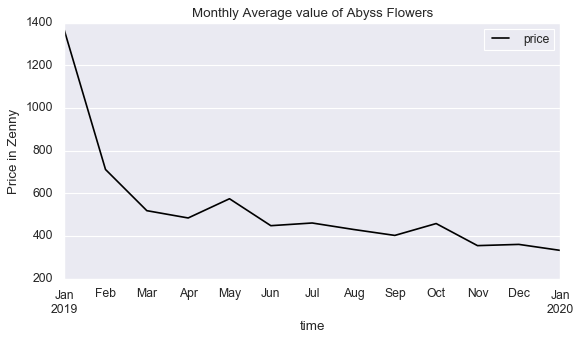

In [26]:
# Group by time: return average price of grouped monthly data
monthly_means = df1.resample('M').agg({'price':'mean'})
monthly_means.plot(kind='line', title='Monthly Average value of Abyss Flowers',figsize=(8,4), colormap='Greys_r')
plt.ylabel('Price in Zenny')

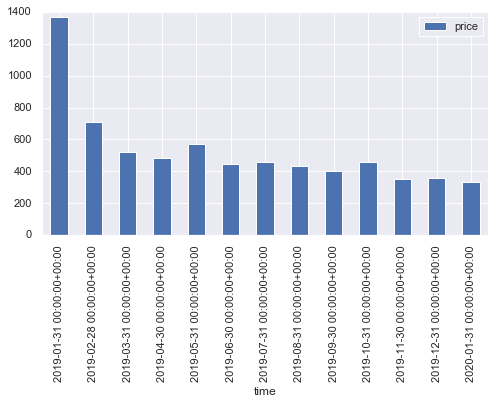

In [48]:
monthly_means.plot(kind='bar', figsize=(8,4))

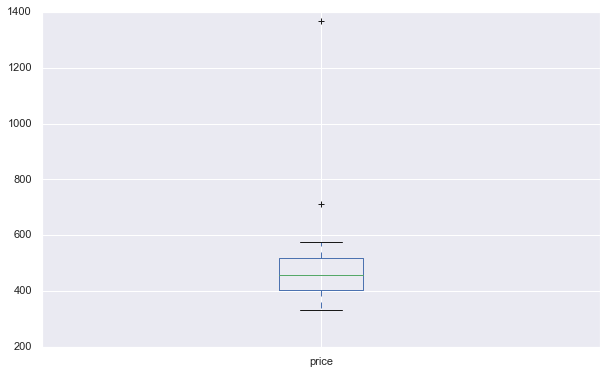

In [50]:
monthly_means.plot(kind='box', figsize=(10,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f02c790>]],
      dtype=object)

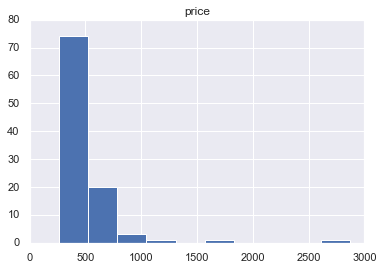

In [35]:
# Looking at the distribution of price
df1.hist(column='price')

In [22]:
# Is Price higher when snap is True or False?
# ax = sns.barplot(x="snap", y="price", hue='server', data=df1, capsize=0.2).set_title('Price of Pet Item Hypnotic Log for True and False snap between the two servers')

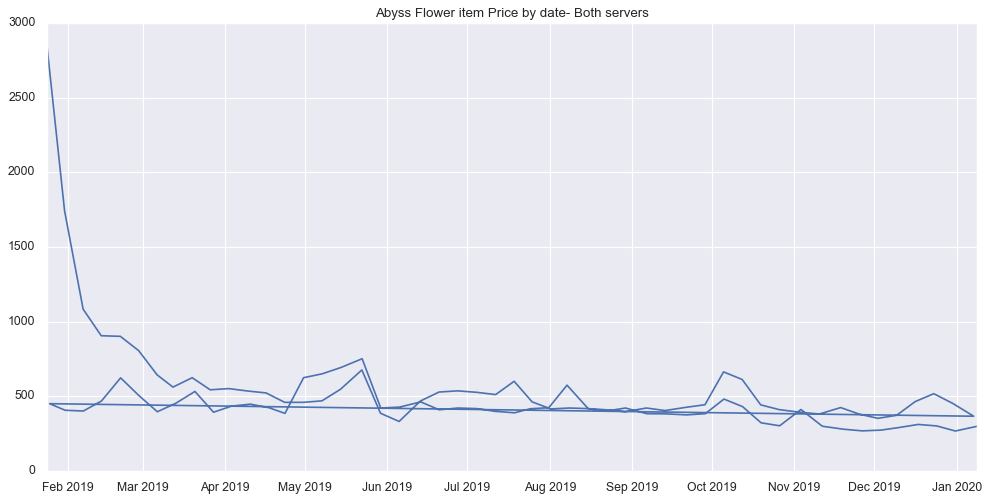

In [28]:
# Time series Plot 1: no resampling
plt.figure(figsize=(15, 7))
plt.plot(df1.price)
plt.title('Abyss Flower item Price by date- Both servers')
plt.show()


In [29]:
# resample to monthly -works
temp_monthly = df1.resample('MS')
month_mean = temp_monthly.price.mean()
month_mean

time
2019-01-01 00:00:00+00:00    1366.250000
2019-02-01 00:00:00+00:00     711.250000
2019-03-01 00:00:00+00:00     518.125000
2019-04-01 00:00:00+00:00     483.900000
2019-05-01 00:00:00+00:00     574.000000
2019-06-01 00:00:00+00:00     447.750000
2019-07-01 00:00:00+00:00     460.333333
2019-08-01 00:00:00+00:00     430.000000
2019-09-01 00:00:00+00:00     402.125000
2019-10-01 00:00:00+00:00     457.750000
2019-11-01 00:00:00+00:00     354.250000
2019-12-01 00:00:00+00:00     360.000000
2020-01-01 00:00:00+00:00     332.000000
Freq: MS, Name: price, dtype: float64

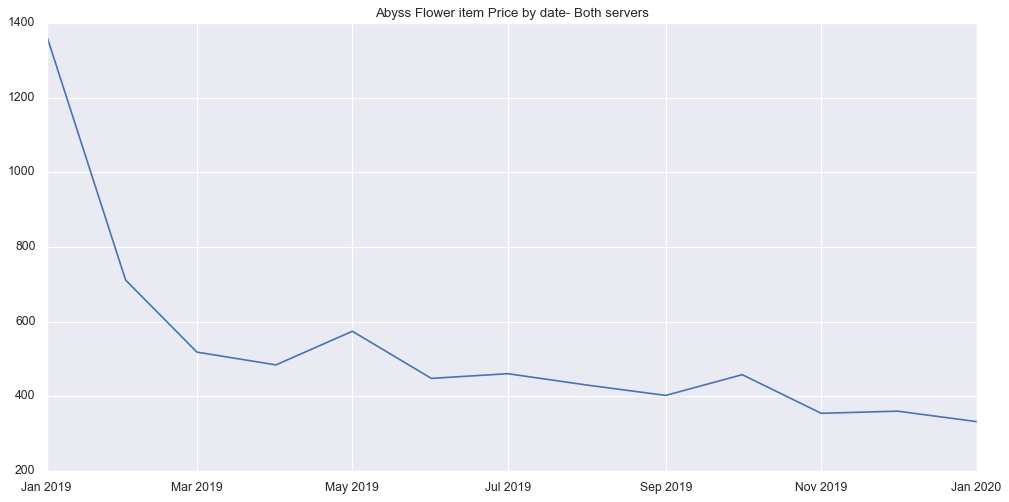

In [30]:
# Time series Plot 2: monthly resample=ing
plt.figure(figsize=(15, 7))
plt.plot(month_mean)
plt.title('Abyss Flower item Price by date- Both servers')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Average price of Abyss flowers, both servers combined')

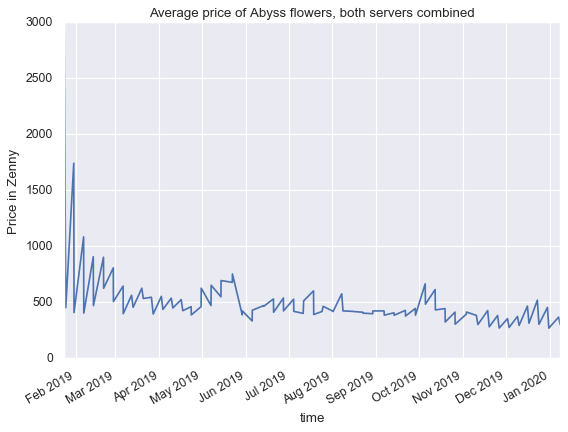

In [33]:
data = df1.price

data.plot()
plt.ylabel('Price in Zenny')
plt.title('Average price of Abyss flowers, both servers combined')


AttributeError: 'Line2D' object has no property 'columns'

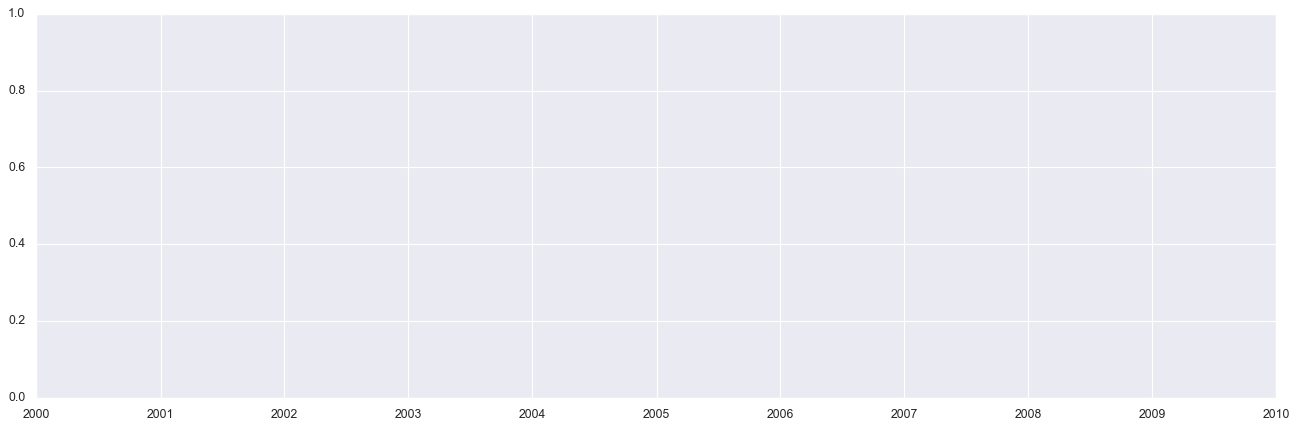

In [53]:
# Dot plot for abyss flowers - you can clearly see the difference between servers now.
data.plot(columns=['server', 'price'], figsize = (20, 6), legend=True, style=['.r','.b'])

In [46]:
# # resample to daily: does not work - time series is irregular
# upsampled = data.resample('').asfreq()
# upsampled

In [61]:
# fill with current missing values with previous valid ones:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(32)

time
2019-01-27 00:00:00+00:00   NaN
2019-02-03 00:00:00+00:00   NaN
2019-02-10 00:00:00+00:00   NaN
2019-02-17 00:00:00+00:00   NaN
2019-02-24 00:00:00+00:00   NaN
2019-03-03 00:00:00+00:00   NaN
2019-03-10 00:00:00+00:00   NaN
2019-03-17 00:00:00+00:00   NaN
2019-03-24 00:00:00+00:00   NaN
2019-03-31 00:00:00+00:00   NaN
2019-04-07 00:00:00+00:00   NaN
2019-04-14 00:00:00+00:00   NaN
2019-04-21 00:00:00+00:00   NaN
2019-04-28 00:00:00+00:00   NaN
2019-05-05 00:00:00+00:00   NaN
2019-05-12 00:00:00+00:00   NaN
2019-05-19 00:00:00+00:00   NaN
2019-05-26 00:00:00+00:00   NaN
2019-06-02 00:00:00+00:00   NaN
2019-06-09 00:00:00+00:00   NaN
2019-06-16 00:00:00+00:00   NaN
2019-06-23 00:00:00+00:00   NaN
2019-06-30 00:00:00+00:00   NaN
2019-07-07 00:00:00+00:00   NaN
2019-07-14 00:00:00+00:00   NaN
2019-07-21 00:00:00+00:00   NaN
2019-07-28 00:00:00+00:00   NaN
2019-08-04 00:00:00+00:00   NaN
2019-08-11 00:00:00+00:00   NaN
2019-08-18 00:00:00+00:00   NaN
2019-08-25 00:00:00+00:00   NaN
201

## 6. Time series modeling

In [119]:
# import warnings                                  # `do not disturbe` mode
# warnings.filterwarnings('ignore')

# import numpy as np                               # vectors and matrices
# import pandas as pd                              # tables and data manipulations
# import matplotlib.pyplot as plt                  # plots
# import seaborn as sns                            # more plots

# from dateutil.relativedelta import relativedelta # working with dates with style
# from scipy.optimize import minimize              # for function minimization

# import statsmodels.formula.api as smf            # statistics and econometrics
# import statsmodels.tsa.api as smt
# import statsmodels.api as sm
# import scipy.stats as scs

# from itertools import product                    # some useful functions
# from tqdm import tqdm_notebook


# # set time column to index
# df1.set_index('time', inplace=True)

# # This is the Arima alternative reddit post
# # https://www.reddit.com/r/datascience/comments/gro5w8/alternative_approaches_to_arima_for_time_series/

KeyError: "None of ['time'] are in the columns"

In [24]:
# # Moving Average:

# import numpy as np
# def moving_average(series, n):
#     """
#         Calculate average of last n observations
#     """
#     return np.average(series[-n:])

# moving_average(df1.price, 24) # prediction for the last observed day (past 24 hours)

362.7916666666667

In [131]:
# from dateutil.relativedelta import relativedelta # working with dates with style
# from scipy.optimize import minimize              # for function minimization

# import statsmodels.formula.api as smf            # statistics and econometrics
# import statsmodels.tsa.api as smt
# import statsmodels.api as sm
# import scipy.stats as scs

# from itertools import product                    # some useful functions
# from tqdm import tqdm_notebook

# # Importing everything from above

# from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
# from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# def mean_absolute_percentage_error(y_true, y_pred): 
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [147]:
# def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

#     """
#         series - dataframe with timeseries
#         window - rolling window size 
#         plot_intervals - show confidence intervals
#         plot_anomalies - show anomalies 

#     """
#     rolling_mean = series.rolling(window=window).mean()

#     plt.figure(figsize=(15,5))
#     plt.title("Moving average\n window size = {}".format(window))
#     plt.plot(rolling_mean, "g", label="Rolling mean trend")

#     # Plot confidence intervals for smoothed values
#     if plot_intervals:
#         mae = mean_absolute_error(series[window:], rolling_mean[window:])
#         deviation = np.std(series[window:] - rolling_mean[window:])
#         lower_bond = rolling_mean - (mae + scale * deviation)
#         upper_bond = rolling_mean + (mae + scale * deviation)
#         plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
#         plt.plot(lower_bond, "r--")
        
#         # Having the intervals, find abnormal values
#         if plot_anomalies:
#             anomalies = pd.DataFrame(index=series.index, columns=series)
#             anomalies[series<lower_bond] = series[series<lower_bond]
#             anomalies[series>upper_bond] = series[series>upper_bond]
#             plt.plot(anomalies, "ro", markersize=10)
        
#     plt.plot(series[window:], label="Actual values")
#     plt.legend(loc="upper left")
#     plt.grid(True)

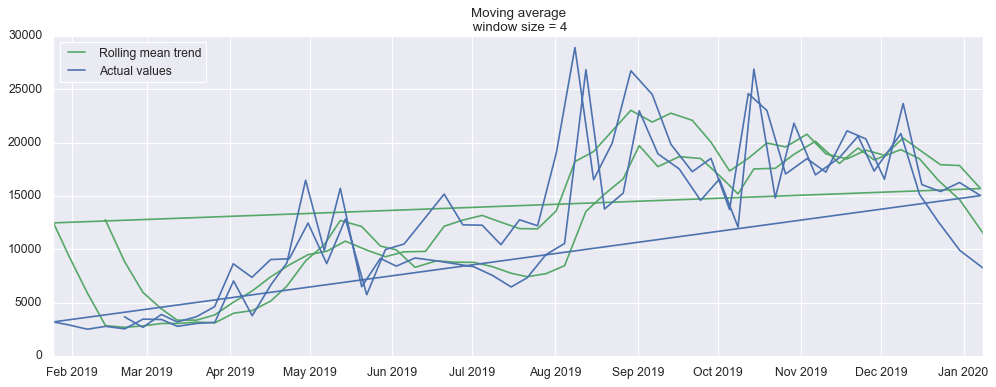

In [133]:
# plotMovingAverage(df1.price, 4)

ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (3,100)

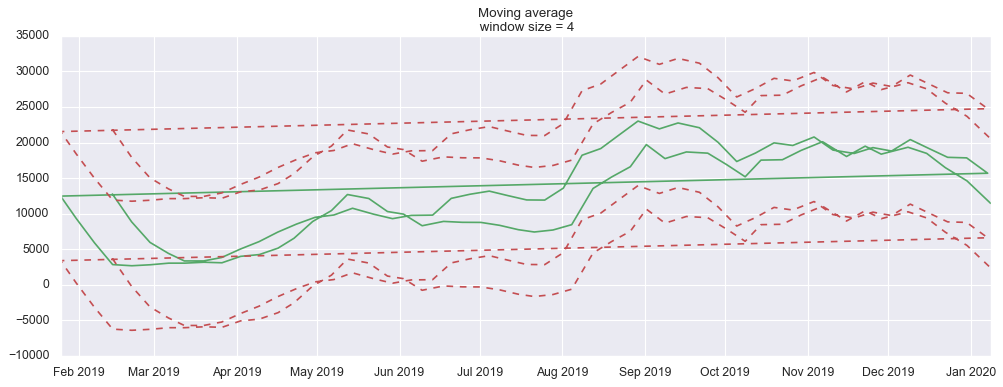

In [148]:
# Needs Fixing Shape mismatch value array of (3, ) mismatched to 3,100
# plotMovingAverage(df1.price, 4, plot_intervals=True, plot_anomalies=True)